# Similarities and Differences between Categories (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '3_July'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df = pd.read_parquet("classification.parquet")


# Eliminate players who maximum number of gambles is 1
df = df.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)


# Reset index
df.index = np.arange(1, len(df) + 1)


# Round wageredamt and profit to 2 decimal places
df['wageredamt'] = df['wageredamt'].round(1)
df['profit'] = df['profit'].round(1)
df['percent_return'] = df['percent_return'].round(1)


In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df['result_type'] = df['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df = pd.concat([df, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df['start_time'] = pd.to_datetime(df['start_time'])

In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df['time_diff'] = df.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df['time_diff'] = df['time_diff'].dt.total_seconds().fillna(0)

## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in dataframe:", len(df['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in dtf:", len(df['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in dtf:", len(df['session_time'].unique()))
print('--------------------------------------------------')

Number of gamblers in dataframe: 13551
--------------------------------------------------
Number of unique visits in dtf: 25
--------------------------------------------------
Number of unique sessions in dtf: 9
--------------------------------------------------


### Wins in a row

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_s = pf.consecutive_wins(df, 'session_time')

In [7]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per session:')
print(df_s.groupby(['clasification', 'session_time'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')

Categories of wins in a row per session:
                               #2ws    #3ws    #4ws
clasification session_time                         
extreme_r     1             38805.0  7483.0  2408.0
              2             14688.0  2788.0   959.0
              3              5681.0  1138.0   375.0
              4              1984.0   377.0   126.0
              5               751.0   116.0    38.0
              6               329.0    40.0    19.0
              7                75.0    24.0     6.0
              8                13.0     2.0     0.0
              9                 5.0     0.0     0.0
high_r        1             11145.0  2206.0   706.0
              2              1784.0   340.0   119.0
              3               265.0    54.0    13.0
              4                46.0     9.0     4.0
              5                 6.0     0.0     0.0
low_r         1              4394.0   789.0   278.0
              2               380.0    66.0    19.0
              3        

In [8]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df = pf.consecutive_wins(df, 'visit')

In [9]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per visit:')
print(df.groupby(['clasification', 'visit'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')


Categories of wins in a row per visit:
                        #2ws    #3ws    #4ws
clasification visit                         
extreme_r     1      28831.0  5585.0  1785.0
              2      19409.0  3730.0  1280.0
              3       8478.0  1568.0   489.0
              4       3020.0   582.0   183.0
              5       1138.0   209.0    89.0
              6        393.0    71.0    20.0
              7        221.0    61.0    18.0
              8        193.0    47.0    26.0
              9        136.0    27.0    12.0
              10        73.0    21.0    10.0
              11        63.0    16.0     2.0
              12        49.0    16.0     3.0
              13        38.0     7.0     0.0
              14        41.0     0.0     0.0
              15        47.0     7.0     3.0
              16         7.0     2.0     1.0
              17        36.0     3.0     0.0
              18        34.0     7.0     0.0
              19        40.0    10.0     2.0
              20

### Gender Differences

In [10]:
# Gender differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'gender'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  gender
extreme_r      F         1626
               M         1781
high_r         F         1615
               M         1791
low_r          F         1631
               M         1777
minimum_r      F         1582
               M         1748
Name: playerkey, dtype: int64
--------------------------------------------------


### Age Differences

In [11]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for dtf and top 20%
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_gen'] = pd.cut(df['age'], bins=bins, labels=generations, right=False)

In [12]:
# Age range differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_range'])['playerkey'].nunique())
print('--------------------------------------------------')


Number of unique players in dtf:
clasification  age_range
extreme_r      18-24          34
               25-40         731
               41-55        1327
               56-75        1219
               76+            96
high_r         18-24          69
               25-40         975
               41-55        1225
               56-75        1075
               76+            62
low_r          18-24          99
               25-40        1139
               41-55        1190
               56-75         919
               76+            61
minimum_r      18-24         193
               25-40        1319
               41-55        1027
               56-75         745
               76+            46
Name: playerkey, dtype: int64
--------------------------------------------------


In [13]:
# Age generation differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_gen'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  age_gen     
extreme_r      Gen Z             34
               Millenials       731
               Gen X           1327
               Baby Boomers    1219
               Silent            96
high_r         Gen Z             69
               Millenials       975
               Gen X           1225
               Baby Boomers    1075
               Silent            62
low_r          Gen Z             99
               Millenials      1139
               Gen X           1190
               Baby Boomers     919
               Silent            61
minimum_r      Gen Z            193
               Millenials      1319
               Gen X           1027
               Baby Boomers     745
               Silent            46
Name: playerkey, dtype: int64
--------------------------------------------------


Male age differences in dtf:
age_range
18-24     188
25-40    2331
41-55    2569
56-75    1880
76+       129
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in dtf:
age_range
18-24     207
25-40    1833
41-55    2200
56-75    2078
76+       136
Name: playerkey, dtype: int64


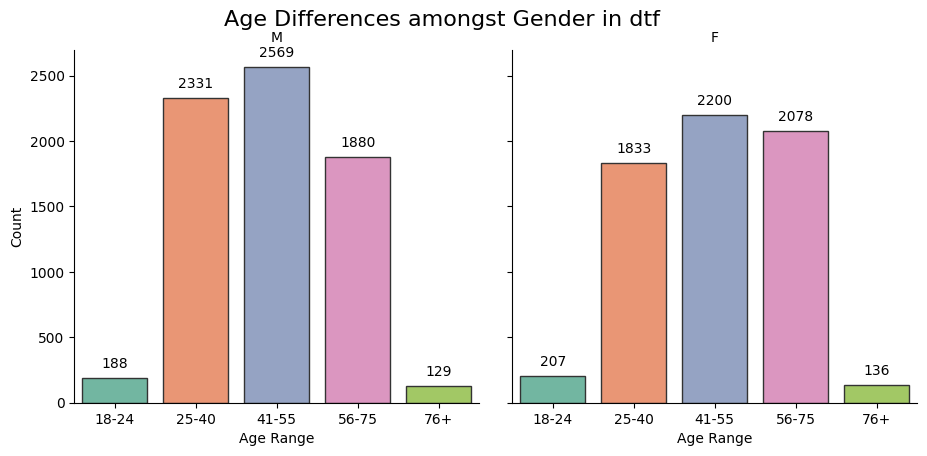

In [14]:
# Age range of male gamblers in dtf
print("Male age differences in dtf:")
print(df[df['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in dtf
print('Female age differences in dtf:')
print(df[df['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df, 'dtf', figsize=(10, 5))


### Increse and Decrease of SlotDenomination and Bet

In [15]:
# Lets do the same but for bottom 20%
players_increase_slot = cf.count_increase(df, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot = cf.count_decrease(df, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet = cf.count_increase(df, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet = cf.count_decrease(df, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 5246
Count of times each player increase_slotdeno : {4: 2, 33: 66, 38: 4, 44: 1, 90: 1, 93: 2, 94: 1, 95: 2, 120: 4, 136: 4, 156: 5, 159: 2, 199: 1, 202: 3, 224: 10, 239: 2, 263: 1, 274: 7, 278: 1, 287: 4, 332: 2, 351: 2, 361: 1, 373: 1, 410: 4, 433: 1, 435: 18, 450: 7, 460: 114, 461: 1, 464: 1, 486: 1, 518: 1, 546: 3, 554: 2, 574: 2, 592: 1, 599: 3, 600: 1, 606: 2, 612: 3, 614: 4, 615: 5, 616: 1, 624: 1, 635: 2, 641: 3, 646: 2, 652: 3, 653: 2, 655: 3, 656: 4, 658: 6, 660: 1, 661: 7, 662: 2, 668: 3, 669: 1, 680: 1, 682: 10, 690: 1, 703: 1, 731: 3, 736: 3, 738: 1, 748: 1, 751: 2, 765: 2, 773: 3, 788: 199, 791: 1, 795: 14, 836: 1, 841: 1, 842: 1, 848: 2, 859: 2, 861: 5, 865: 1, 870: 3, 878: 4, 879: 2, 880: 2, 899: 2, 901: 16, 903: 1, 915: 6, 927: 5, 931: 7, 938: 4, 939: 4, 940: 2, 942: 1, 949: 1, 950: 1, 956: 1, 957: 2, 976: 1, 979: 4, 982: 17, 987: 9, 990: 1, 991: 1, 996: 13, 997: 3, 1000: 1, 1008: 13, 1010: 2, 1011: 1, 1013: 5, 1016: 11, 1017: 1

### Wealth Differences
#### General

In [16]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df['depletion_rate'] = df.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


#### Per Visit

In [17]:
# Create dataframe for Machine Learning model
df_ML_v = pf.transform_ml(data_b=df, grouping='visit')

In [18]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_v = df_ML_v[df_ML_v.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_v))

# Remove players with NaN values
df_ML_v = df_ML_v[~df_ML_v['playerkey'].isin(list_discrepancy_v)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_v['playerkey'].nunique())

Number of unique players in df_ML_v:  13551
Number of discrepancies: 351
Number of unique players w/o discrepancies:  13200


In [19]:
print(df_ML_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']


df_ML_v = df_ML_v.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit_ALL.parquet')

Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '2ws/min

#### Per Session

In [20]:
df_ML_s = pf.transform_ml(data_b=df_s, grouping='session_time')

In [21]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_s = df_ML_s[df_ML_s.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_s))

# Remove players with NaN values
df_ML_s = df_ML_s[~df_ML_s['playerkey'].isin(list_discrepancy_s)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_s['playerkey'].nunique())

Number of unique players in df_ML_v:  13551
Number of discrepancies: 346
Number of unique players w/o discrepancies:  13205


In [22]:
print(df_ML_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']

df_ML_s = df_ML_s.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session_ALL.parquet')


Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '